# AOS_WCS_check

In [21]:
from astropy.table import Table
import matplotlib.pyplot as plt 
import numpy as np 

I compare the results of running the same `inst` file  with **arrows** run for R22 of lsstCam **before** and **after** the updates to  `data/lsst` `focalplanelayout.txt` and `segmentation.txt`

The arrows were made on epyc with `ts_phosim/notebooks/analysis_notebooks/AOS_sensor_outlines_arrows.ipynb`

The x,y position in pixels was stored on epyc and copied to LSP with 

    scp suberlak@epyc.astro.washington.edu:/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_notebooks/comcamArrowPx.txt /project/scichris/aos/segmentation_update/comcam/

The catalog in x,y is:

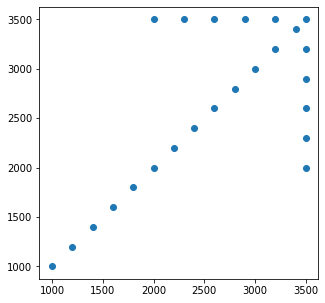

In [24]:
x,y = np.loadtxt('/project/scichris/aos/segmentation_update/comcam/comcamArrowPx.txt')
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(x,y)

Show the ra,dec input catalog, that was made  with

    skySim.addStarByChipPos(sensor, starId, xPx[i],
                                yPx[i], starMag)
                                
    skySim.exportSkyToFile(outputSkyFilePath)

In [18]:
# That sky catalog was used as an input in  `epyc` `analysis_scripts/runComCamStarCatalog.txt` 
# to make `analysis_scripts/results_arrow/singleArrowDec/`

path = '/project/scichris/aos/segmentation_update/comcam/skyComcamArrows.txt'
cat= Table.read(path, format='ascii')

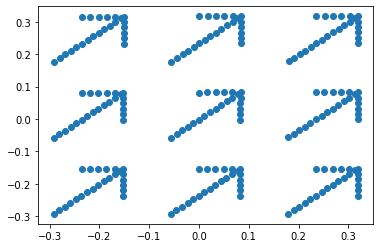

In [20]:
%matplotlib inline
m = cat['Ra']>180
cat['Ra'][m] = cat['Ra'][m]-360
plt.scatter(cat['Ra'], cat['Decl'])

I took the `inst` file from `epyc`:

     scp suberlak@epyc.astro.washington.edu:/astro/store/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_arrow/singleArrowDec/iter0/pert/starExtra.inst /project/scichris/aos/segmentation_update/comcam/
     
And changed only `SIM_VISTIME` to `1.0`  seconds  to make the run quicker. 

Now I run it with phosim using `noBkgnd.cmd ` , which doesn't run background or perturbations, but is much quicker 

I do that on  NCSA `lsst-devl03`

# before update: 



    ssh scichris@lsst-login01.ncsa.illinois.edu 
    ssh lsst-devl03 
    source "/software/lsstsw/stack3/loadLSST.bash"
    
    
    cd /project/scichris/aos/phosim_syseng4/
    git checkout tags/v.1.0.4  #  the last tag before the update 
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/segmentation_update/comcam/starExtra.inst -i lsst -e 1 -c /project/scichris/aos/segmentation_update/comcam/noBkgnd.cmd -p 25 -o /project/scichris/aos/segmentation_update/comcam/test_before_arrows/ > /project/scichris/aos/segmentation_update/comcam/test_before_arrows/starPhoSim.log 2>&1
    
    
    

Need to repackage with the old repackager (given the old raft names etc. )
    
    cd /project/scichris/aos/phosim_utils/
    git checkout tags/v0.1.2
    scons -c
    scons
    setup -k -r .
    
    phosim_repackager.py /project/scichris/aos/segmentation_update/comcam/test_before_arrows/ --out_dir /project/scichris/aos/segmentation_update/comcam/test_before_arrows/repackaged/ --prefix lsst --verbose
    
    
    

Show the result:
    

In [29]:
from astropy.io import fits
fpath = '/project/scichris/aos/segmentation_update/\
comcam/test_before_arrows/repackaged/lsst_a_9006001_f1_R22_S00_E000.fits'
hdul = fits.open(fpath)

for i in range(1,len(hdul)):
    for header in ['CD1_1', 'CD1_2', 'CD2_1', 'CD2_2']:
        print(i, hdul[i].header['AMPID'], hdul[i].header[header])

1 C00 0.0
1 C00 5.55555555555556e-05
1 C00 -5.55555555555556e-05
1 C00 0.0
2 C01 0.0
2 C01 5.55555555555556e-05
2 C01 -5.55555555555556e-05
2 C01 0.0
3 C02 0.0
3 C02 5.55555555555556e-05
3 C02 -5.55555555555556e-05
3 C02 0.0
4 C03 0.0
4 C03 5.55555555555556e-05
4 C03 -5.55555555555556e-05
4 C03 0.0
5 C04 0.0
5 C04 5.55555555555556e-05
5 C04 -5.55555555555556e-05
5 C04 0.0
6 C05 0.0
6 C05 5.55555555555556e-05
6 C05 -5.55555555555556e-05
6 C05 0.0
7 C06 0.0
7 C06 5.55555555555556e-05
7 C06 -5.55555555555556e-05
7 C06 0.0
8 C07 0.0
8 C07 5.55555555555556e-05
8 C07 -5.55555555555556e-05
8 C07 0.0
9 C17 0.0
9 C17 -5.55555555555556e-05
9 C17 -5.55555555555556e-05
9 C17 -0.0
10 C16 0.0
10 C16 -5.55555555555556e-05
10 C16 -5.55555555555556e-05
10 C16 -0.0
11 C15 0.0
11 C15 -5.55555555555556e-05
11 C15 -5.55555555555556e-05
11 C15 -0.0
12 C14 0.0
12 C14 -5.55555555555556e-05
12 C14 -5.55555555555556e-05
12 C14 -0.0
13 C13 0.0
13 C13 -5.55555555555556e-05
13 C13 -5.55555555555556e-05
13 C13 -0.0

# after update

    ssh scichris@lsst-login01.ncsa.illinois.edu 
    ssh lsst-devl03 
    source "/software/lsstsw/stack3/loadLSST.bash"
    setup lsst_distrib

    cd /project/scichris/aos/phosim_syseng4/
    # git tag -n # show tags 
    git checkout tags/v1.0.5  #  the tag of the geometry update for data/lsst 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/segmentation_update/comcam/starExtra.inst -i lsst -e 1 -c /project/scichris/aos/segmentation_update/comcam/noBkgnd.cmd -p 25 -o /project/scichris/aos/segmentation_update/comcam/test_after_arrows/ > /project/scichris/aos/segmentation_update/comcam/test_after_arrows/starPhoSim.log 2>&1
    
    
    Need to repackage with the new repackager (i.e. after the update... ) 

    #it depends on ts_phosim:
    source /project/scichris/aos/setup_aos_current.sh 

    cd /project/scichris/aos/phosim_utils/
    git checkout tags/v0.2   # that is after the major update 
    
    scons -c
    scons
    setup -k -r .

    phosim_repackager.py /project/scichris/aos/segmentation_update/comcam/test_after_arrows/ --out_dir /project/scichris/aos/segmentation_update/comcam/test_after_arrows/repackaged/ --prefix lsst --verbose


Show the result:

In [30]:
from astropy.io import fits
fpath = '/project/scichris/aos/segmentation_update/\
comcam/test_after_arrows/repackaged/MC_H_20000217_006001_R22_S00.fits'
hdul = fits.open(fpath)

for i in range(1,len(hdul)):
    for header in ['CD1_1', 'CD1_2', 'CD2_1', 'CD2_2']:
        print(i, hdul[i].header['AMPID'], hdul[i].header[header])

1 C10 0.0
1 C10 -5.55555555555556e-05
1 C10 -5.55555555555556e-05
1 C10 -0.0
2 C11 0.0
2 C11 -5.55555555555556e-05
2 C11 -5.55555555555556e-05
2 C11 -0.0
3 C12 0.0
3 C12 -5.55555555555556e-05
3 C12 -5.55555555555556e-05
3 C12 -0.0
4 C13 0.0
4 C13 -5.55555555555556e-05
4 C13 -5.55555555555556e-05
4 C13 -0.0
5 C14 0.0
5 C14 -5.55555555555556e-05
5 C14 -5.55555555555556e-05
5 C14 -0.0
6 C15 0.0
6 C15 -5.55555555555556e-05
6 C15 -5.55555555555556e-05
6 C15 -0.0
7 C16 0.0
7 C16 -5.55555555555556e-05
7 C16 -5.55555555555556e-05
7 C16 -0.0
8 C17 0.0
8 C17 -5.55555555555556e-05
8 C17 -5.55555555555556e-05
8 C17 -0.0
9 C07 -0.0
9 C07 5.55555555555556e-05
9 C07 5.55555555555556e-05
9 C07 0.0
10 C06 -0.0
10 C06 5.55555555555556e-05
10 C06 5.55555555555556e-05
10 C06 0.0
11 C05 -0.0
11 C05 5.55555555555556e-05
11 C05 5.55555555555556e-05
11 C05 0.0
12 C04 -0.0
12 C04 5.55555555555556e-05
12 C04 5.55555555555556e-05
12 C04 0.0
13 C03 -0.0
13 C03 5.55555555555556e-05
13 C03 5.55555555555556e-05
13 C

# Update ts_wep test files in `ts_wep/tests/testData/phosimOutput/realComCam/repackagedFiles/...` 

There are amp and e-image files. Update the `ROTANG` header, so that it is increased by 90 degrees:
    

In [ ]:
Change 